# Data cleaning

In [116]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [ ]:
files_to_import = [degree_top_cat.csv,
                   female_researchers_EU.csv,
                   females_employed_in_ST_EU.csv,
                   graduated_world.csv,
                   males_emplyed_in_ST_EU.csv,
                   mix_data_graduates_school_age.csv,
                   nobel.csv,notes_tall_sele.csv,
                   people_age_tertiary_education.csv,
                   sex_ratio_at_birth_males_chao_et_al.csv,
                   sex_ratio_at_birth.csv,
                   sex_ratio_at_five_years_old.csv,
                   sex_ratio_by_age.csv,
                   share_population_female.csv,
                   tertiary_education_women.csv,
                   women_men_scientist_EU.csv,
                   women_men_scientists_EU_2.csv
                  ]

In [ ]:
'''degree_top_cat.csv,
female_researchers_EU.csv,
females_employed_in_ST_EU.csv,
graduated_world.csv,
males_emplyed_in_ST_EU.csv,
mix_data_graduates_school_age.csv,
nobel.csv,notes_tall_sele.csv,
people_age_tertiary_education.csv,
sex_ratio_at_birth_males_chao_et_al.csv,
sex_ratio_at_birth.csv,
sex_ratio_at_five_years_old.csv,
sex_ratio_by_age.csv,
share_population_female.csv,
tertiary_education_women.csv,
women_men_scientist_EU.csv,
women_men_scientists_EU_2.csv'''

## Sex ratio at birth (males/100 females)

In [53]:
sexr_birth = pd.read_csv("data/sex_ratio_at_birth.csv")


In [54]:
sexr_birth.columns = ['Entity', 'Code', 'Year',
       'male/100female']

In [67]:
sexr_birth[sexr_birth["Year"]==2017]

,Entity,Code,Year,male/100female
20,Afghanistan,AFG,2017,106.0
41,Albania,ALB,2017,107.8
62,Algeria,DZA,2017,105.0
83,Angola,AGO,2017,103.0
104,Antigua and Barbuda,ATG,2017,103.0
...,...,...,...,...
4877,Venezuela,VEN,2017,105.0
4898,Vietnam,VNM,2017,109.7
4939,Yemen,YEM,2017,105.0
4960,Zambia,ZMB,2017,103.0


,Entity,Code,Year,male/100female
0,Afghanistan,AFG,1962,106.0
1,Afghanistan,AFG,1967,106.0
2,Afghanistan,AFG,1972,106.0
3,Afghanistan,AFG,1977,106.0
4,Afghanistan,AFG,1982,106.0
5,Afghanistan,AFG,1987,106.0
6,Afghanistan,AFG,1990,106.0
7,Afghanistan,AFG,1992,106.0
8,Afghanistan,AFG,1997,106.0
9,Afghanistan,AFG,2002,106.0


## Sex ratio throught the years (males/100 females)

In [52]:
sexr_years = pd.read_csv("data/sex_ratio_by_age.csv")

In [424]:
sexr_years.head()

,Country,Code,Year,15_yrs,20_yrs,30_yrs,40_yrs,50_yrs,60_yrs,70_yrs,80_yrs,90_yrs,100_yrs
0,Afghanistan,AFG,1990,107.606890,106.470367,97.200196,101.432710,96.413713,90.443686,89.011455,86.713287,42.857143,107.567880
1,Afghanistan,AFG,1991,108.102380,107.016689,101.244920,104.548683,95.638925,91.652546,88.065374,110.526316,42.857143,108.069693
2,Afghanistan,AFG,1992,108.753854,107.698225,105.467180,107.982231,95.461732,92.693197,87.860292,111.612903,50.000000,108.764971
3,Afghanistan,AFG,1993,109.380552,108.395056,108.376955,108.518621,96.194394,94.127130,87.511285,106.214689,50.000000,109.405085
4,Afghanistan,AFG,1994,109.850800,108.881665,109.077761,105.456109,97.710829,96.144108,86.912120,98.876404,50.000000,109.779351


In [426]:
sexr_years[sexr_years['Country']=='Egypt'].mean()

Year       1982.500000
15_yrs      104.821943
20_yrs      101.144022
30_yrs      100.642823
40_yrs       98.788558
50_yrs       90.874688
60_yrs       78.987170
70_yrs       64.383352
80_yrs       40.917329
90_yrs       14.114555
100_yrs     106.116367
dtype: float64

In [80]:
sexr_years.columns = ['Country', 'Code', 'Year', '100_yrs',
       '15_yrs',
       '20_yrs',
       '30_yrs',
       '40_yrs',
       '50_yrs',
       '60_yrs',
       '70_yrs',
       '80_yrs',
       '90_yrs']

In [81]:
sexr_years = sexr_years[['Country', 'Code', 'Year',
       '15_yrs',
       '20_yrs',
       '30_yrs',
       '40_yrs',
       '50_yrs',
       '60_yrs',
       '70_yrs',
       '80_yrs',
       '90_yrs',
       '100_yrs']]

In [82]:
#should I take the average ratio (over the years)? 

sexr_years.groupby("Country")[['15_yrs',
       '20_yrs',
       '30_yrs',
       '40_yrs',
       '50_yrs',
       '60_yrs',
       '70_yrs',
       '80_yrs',
       '90_yrs',
       '100_yrs']].mean()

,15_yrs,20_yrs,30_yrs,40_yrs,50_yrs,60_yrs,70_yrs,80_yrs,90_yrs,100_yrs
Country,,,,,,,,,,
Afghanistan,106.726386,108.645750,109.383778,107.003561,104.382058,102.168616,85.220051,78.254466,45.141403,105.756304
Africa,100.543197,98.875808,98.023633,95.262832,90.277777,83.367406,75.749919,56.578748,26.854945,101.303343
Albania,106.585146,102.829338,104.371601,106.670667,102.163561,91.914158,76.631521,48.066550,45.880413,106.435468
Algeria,103.748809,101.463374,99.078244,96.862044,96.595066,93.588465,86.142356,75.090386,62.567129,104.044997
Angola,97.077621,94.683326,93.145577,90.201131,84.726234,77.904478,65.817976,46.849330,18.088264,97.528396
...,...,...,...,...,...,...,...,...,...,...
Western Sahara,110.645499,121.693146,134.127766,136.247825,128.438986,114.580409,101.587485,82.318351,NaN,105.186085
World,104.248846,103.044571,101.727257,98.907248,92.655386,81.385579,67.664073,44.240024,23.652859,104.823958
Yemen,102.597591,97.900408,94.074213,92.404423,89.797244,84.552575,85.631492,68.449720,34.236002,102.851101


In [70]:
#should I just take the data from the last available year (2015)?

sexr_years[sexr_years["Year"]==2015]

,Entity,Code,Year,15_yrs,20_yrs,30_yrs,40_yrs,50_yrs,60_yrs,70_yrs,80_yrs,90_yrs,100_yrs
25,Afghanistan,AFG,2015,105.998033,107.004742,109.356582,112.198038,108.885775,102.158580,88.325325,80.711219,67.745803,40.000000
91,Africa,NaN,2015,101.975553,101.294583,99.200745,98.422808,95.244795,91.296937,84.479727,74.294529,58.273247,34.992224
157,Albania,ALB,2015,103.116917,114.688507,108.207052,90.521110,95.450063,99.191620,99.775931,90.927054,44.812165,26.530612
223,Algeria,DZA,2015,104.429598,103.603873,101.323156,100.024892,99.750962,105.740137,95.057167,89.289875,89.818306,100.996678
289,Angola,AGO,2015,96.894144,95.968628,94.861455,94.191496,91.776734,87.007881,81.502183,70.626733,46.837945,21.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15601,Western Sahara,ESH,2015,101.800400,102.184054,116.624365,115.955176,126.230228,128.969791,110.152284,105.555556,80.952381,NaN
15667,World,OWID_WRL,2015,106.929543,106.377936,103.539199,102.601921,100.500310,96.396944,89.056243,73.763476,49.640029,25.758375
15733,Yemen,YEM,2015,103.946005,103.603795,101.774333,106.804109,87.666277,96.426777,89.906866,75.825003,72.727273,50.000000
15799,Zambia,ZMB,2015,100.668068,100.064335,99.113205,97.650863,90.362645,76.683425,76.198180,71.351263,56.981132,33.333333


In [83]:
# university wise the ratio we would be interesed in is the 15-20-30 yrs

ratio_uni = sexr_years[sexr_years["Year"]==2015][['Country','15_yrs','20_yrs','30_yrs']]

In [78]:
ratio_uni = ratio_uni.reset_index(drop=True)

In [91]:
ratio_uni.head()

,Country,15_yrs,20_yrs,30_yrs
25,Afghanistan,107.004742,109.356582,112.198038
91,Africa,101.294583,99.200745,98.422808
157,Albania,114.688507,108.207052,90.521110
223,Algeria,103.603873,101.323156,100.024892
289,Angola,95.968628,94.861455,94.191496


## Female Population %

In [85]:
female_wpop = pd.read_csv("data/share_population_female.csv")

In [92]:
female_wpop.columns = ['Country', 'Code', 'Year',
       '%female/%total']

In [98]:
# last year available is 2017
# percentage of females per country

female_2017 = female_wpop[female_wpop['Year']==2017][["Country","%female/%total" ]]

## Tertiary education

In [131]:
tertiary = pd.read_csv('data/mix_data_graduates_school_age.csv')

In [132]:
tertiary.head()

,EDULIT_IND,Indicator,LOCATION,Country,TIME,Time,Value,Flag Codes,Flags
0,FGP_5T8,Percentage of graduates from tertiary educatio...,PSE,Palestine,2013,2013,59.48865,NaN,NaN
1,FGP_5T8,Percentage of graduates from tertiary educatio...,PSE,Palestine,2014,2014,60.41249,NaN,NaN
2,FGP_5T8,Percentage of graduates from tertiary educatio...,PSE,Palestine,2015,2015,60.28197,NaN,NaN
3,FGP_5T8,Percentage of graduates from tertiary educatio...,PSE,Palestine,2016,2016,61.09075,NaN,NaN
4,FGP_5T8,Percentage of graduates from tertiary educatio...,PSE,Palestine,2017,2017,60.81508,NaN,NaN


In [133]:
# renaming columns

tertiary.columns = ['EDULIT_IND', 'Indicator', 'Code', 'Country', 'TIME', 'Year',
       'Value', 'Flag Codes', 'Flags']

In [134]:
# eliminating columns

tertiary = tertiary[['Indicator', 'Code', 'Country', 'Year',
       'Value']]

In [113]:
tertiary['Indicator'].value_counts()

School age population, tertiary education, female (number)                                                                           1079
School age population, tertiary education, both sexes (number)                                                                       1079
School age population, tertiary education, male (number)                                                                             1079
Percentage of graduates from tertiary education who are female (%)                                                                    565
Percentage of graduates from Science, Technology, Engineering and Mathematics programmes in tertiary education, both sexes (%)        412
Percentage of male graduates from Science, Technology, Engineering and Mathematics programmes in tertiary education, male (%)         402
Percentage of female graduates from Science, Technology, Engineering and Mathematics programmes in tertiary education, female (%)     402
Name: Indicator, dtype: int64

In [135]:
tertiary.head()

,Indicator,Code,Country,Year,Value
0,Percentage of graduates from tertiary educatio...,PSE,Palestine,2013,59.48865
1,Percentage of graduates from tertiary educatio...,PSE,Palestine,2014,60.41249
2,Percentage of graduates from tertiary educatio...,PSE,Palestine,2015,60.28197
3,Percentage of graduates from tertiary educatio...,PSE,Palestine,2016,61.09075
4,Percentage of graduates from tertiary educatio...,PSE,Palestine,2017,60.81508


In [142]:
females_ter = tertiary[(tertiary["Indicator"]=='School age population, tertiary education, female (number)') 
         & (tertiary['Year']==2018)]

In [146]:
#indicator and year is the same so we can eliminate it

females_ter = females_ter [['Code', 'Country', 'Value']]

In [149]:
# reset index

females_ter = females_ter.reset_index(drop=True)

In [154]:
females_ter['Country'].values

# it seems that northern America and Europe are catalogued in the same group


array(['China, Macao Special Administrative Region', 'Mozambique',
       'Brunei Darussalam', 'Upper middle income countries',
       'Central Asia', 'El Salvador', 'Cabo Verde', 'Uzbekistan',
       'Kyrgyzstan', 'World', 'China', 'Jamaica', 'Bahrain', 'Niger',
       'Ghana', 'Honduras', 'Arab States', 'Viet Nam', 'Oman', 'Peru',
       'Saint Vincent and the Grenadines', 'Belarus', 'Grenada',
       'Sri Lanka', 'Mongolia', 'Serbia', 'Cambodia', 'Rwanda',
       'Pakistan', 'Latin America and the Caribbean', 'Tunisia',
       'Lower middle income countries', 'Algeria', 'Azerbaijan',
       'High income countries', 'Jordan',
       "Lao People's Democratic Republic", 'Indonesia', 'Bangladesh',
       'Malaysia', 'Saint Lucia', 'Burkina Faso', 'Lesotho', 'Madagascar',
       'Afghanistan', 'Kazakhstan', 'Seychelles', 'Nepal', 'Montenegro',
       'Myanmar', 'Central and Eastern Europe', 'Haiti', 'Armenia',
       'Middle income countries', "Democratic People's Republic of Korea",
   

## Tertiary education (Europe)(females/100 males)

In [162]:
tertiary_EU = pd.read_csv('data/tertiary_education_women.csv')

In [166]:
tertiary_EU.head()

,Year,Country,Value
0,2003,Belgium,114.4
1,2004,Belgium,116.5
2,2005,Belgium,119.4
3,2006,Belgium,120.8
4,2007,Belgium,122.0


In [164]:
tertiary_EU.columns = ['Year', 'Country', 'INDIC_ED', 'Value']

In [165]:
tertiary_EU = tertiary_EU[['Year', 'Country','Value']]

In [173]:
# info is only up to 2012... pretty old...

tertiary_EU[tertiary_EU['Year']==2012]

# but we can see that in general more women go to university than men

,Year,Country,Value
9,2012,Belgium,124.7
19,2012,French Community in Belgium including small Ge...,:
29,2012,Flemish Community in Belgium,:
39,2012,Bulgaria,120.4
49,2012,Czechia,133.9
59,2012,Denmark,134.8
69,2012,Germany (until 1990 former territory of the FRG),100.3
79,2012,Estonia,144.9
89,2012,Ireland,103.5
99,2012,Greece,96.6


## People in STEM  (EU)

In [175]:
STEM_EU = pd.read_csv('data/women_men_scientists_EU_2.csv')

In [254]:
STEM_EU.head()

,SEX,GEO,TIME,CATEGORY,NACE_R2,AGE,UNIT,Value,Flag and Footnotes
0,Total,European Union - 28 countries (2013-2020),2016,Scientists and engineers,Total - all NACE activities,From 15 to 74 years,Thousand,"17,212.0",NaN
1,Total,European Union - 28 countries (2013-2020),2016,Scientists and engineers,High-technology sectors (high-technology manuf...,From 15 to 74 years,Thousand,"2,939.6",NaN
2,Total,European Union - 28 countries (2013-2020),2016,Scientists and engineers,Manufacturing,From 15 to 74 years,Thousand,"2,284.3",NaN
3,Total,European Union - 28 countries (2013-2020),2016,Scientists and engineers,High and medium high-technology manufacturing,From 15 to 74 years,Thousand,"1,463.4",NaN
4,Total,European Union - 28 countries (2013-2020),2016,Scientists and engineers,Services,From 15 to 74 years,Thousand,"13,729.7",NaN


## Female researchers

In [177]:
female_research_EU = pd.read_csv('data/female_researchers_EU.csv')

In [255]:
female_research_EU.head()

,TIME,GEO,SECTPERF,UNIT,Value
0,2009,European Union - 27 countries (from 2020),All sectors,Percentage based on head count (HC),31.8
1,2010,European Union - 27 countries (from 2020),All sectors,Percentage based on head count (HC),:
2,2011,European Union - 27 countries (from 2020),All sectors,Percentage based on head count (HC),32.1
3,2012,European Union - 27 countries (from 2020),All sectors,Percentage based on head count (HC),:
4,2013,European Union - 27 countries (from 2020),All sectors,Percentage based on head count (HC),32.2


## STEM employment

In [223]:
# importing both male and female files

female_STEM_job_EU = pd.read_csv('data/females_employed_in_ST_EU2.csv',sep=';')
male_STEM_job_EU = pd.read_csv('data/males_employed_in_ST_EU2.csv',sep=';')

### Female STEM (15-74yrs) (value in thousands)
**People with tertiary education (ISCED) and/or employed in science and technology**

In [224]:
female_STEM_job_EU.head()

,TIME,GEO,SEX,CATEGORY,NACE_R2,AGE,UNIT,Value
0,2010,European Union - 27 countries (from 2020),Females,Persons with tertiary education (ISCED) and/or...,Total - all NACE activities,From 15 to 74 years,Thousand,38068.0
1,2011,European Union - 27 countries (from 2020),Females,Persons with tertiary education (ISCED) and/or...,Total - all NACE activities,From 15 to 74 years,Thousand,38304.2
2,2012,European Union - 27 countries (from 2020),Females,Persons with tertiary education (ISCED) and/or...,Total - all NACE activities,From 15 to 74 years,Thousand,39357.5
3,2013,European Union - 27 countries (from 2020),Females,Persons with tertiary education (ISCED) and/or...,Total - all NACE activities,From 15 to 74 years,Thousand,40051.1
4,2014,European Union - 27 countries (from 2020),Females,Persons with tertiary education (ISCED) and/or...,Total - all NACE activities,From 15 to 74 years,Thousand,41372.5


In [192]:
female_STEM_job_EU["CATEGORY"].value_counts()
# age can be eliminated (ALL THE SAME)
# also category
# also NACE_R2
# SEX can stay to join it with male

Persons with tertiary education (ISCED) and/or employed in science and technology    390
Name: CATEGORY, dtype: int64

In [225]:
female_STEM_job_EU.columns

Index(['TIME', 'GEO', 'SEX', 'CATEGORY', 'NACE_R2', 'AGE', 'UNIT', 'Value'], dtype='object')

In [226]:
# let's eliminate some columns

female_STEM_job_EU = female_STEM_job_EU[['TIME', 'GEO', 'SEX','Value']]

In [227]:
# and rename a few
female_STEM_job_EU.columns = ['Year', 'Country', 'Sex', 'STEM_f_value']

In [250]:
females_STEM_EU28_evolution = female_STEM_job_EU[female_STEM_job_EU['Country']=='European Union - 28 countries (2013-2020)']

In [251]:
females_STEM_EU28_evolution

,Year,Country,Sex,STEM_f_value
10,2010,European Union - 28 countries (2013-2020),Females,44405.8
11,2011,European Union - 28 countries (2013-2020),Females,45525.6
12,2012,European Union - 28 countries (2013-2020),Females,46753.2
13,2013,European Union - 28 countries (2013-2020),Females,47773.2
14,2014,European Union - 28 countries (2013-2020),Females,49328.6
15,2015,European Union - 28 countries (2013-2020),Females,50774.8
16,2016,European Union - 28 countries (2013-2020),Females,52258.6
17,2017,European Union - 28 countries (2013-2020),Females,53647.4
18,2018,European Union - 28 countries (2013-2020),Females,55166.9
19,2019,European Union - 28 countries (2013-2020),Females,56793.5


In [252]:
females_STEM_EU28_evolution['STEM_f_value'].dtype

dtype('float64')

#### Graph females 2010-2019 (28 EU countries counting the UK)

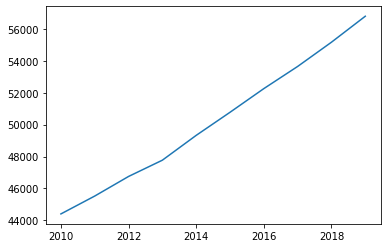

In [253]:
plt.plot(females_STEM_EU28_evolution['Year'],females_STEM_EU28_evolution['STEM_f_value'])

### Male STEM

In [236]:
# let's eliminate some columns

male_STEM_job_EU = male_STEM_job_EU[['TIME', 'GEO', 'SEX','Value']]

In [237]:
# and rename a few
male_STEM_job_EU.columns = ['Year', 'Country', 'Sex', 'STEM_f_value']

In [240]:
male_STEM_job_EU.head()

,Year,Country,Sex,STEM_f_value
0,2010,European Union - 27 countries (from 2020),Males,37565.7
1,2011,European Union - 27 countries (from 2020),Males,38841.7
2,2012,European Union - 27 countries (from 2020),Males,39592.6
3,2013,European Union - 27 countries (from 2020),Males,40082.6
4,2014,European Union - 27 countries (from 2020),Males,40940.9


In [248]:
males_STEM_EU28_evolution = male_STEM_job_EU[male_STEM_job_EU['Country']=='European Union - 28 countries (2013-2020)']

#### Graph males 2010-2019 (28 EU countries counting the UK)

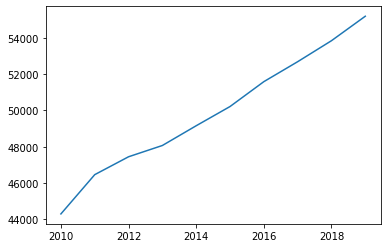

In [249]:
plt.plot(males_STEM_EU28_evolution['Year'],males_STEM_EU28_evolution['STEM_f_value'])

## Top degree choices (2019 Catalonia)

In [31]:
degree_top_cat = pd.read_csv("data/degree_top_cat.csv",sep=';')

## University entry grade  ( june 2019 Catalonia)

In [35]:
notes_tall_sele = pd.read_csv("data/notes_tall_sele.csv",sep=';')

## Nobel price

In [256]:
nobel = pd.read_csv("data/nobel.csv")

In [257]:
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [260]:
nobel['birth_country'].value_counts().index

# top 10 countries
# United States of America', 'United Kingdom', 'Germany', 'France',
# 'Sweden', 'Japan', 'Canada', 'Netherlands', 'Italy', 'Russia'

Index(['United States of America', 'United Kingdom', 'Germany', 'France',
       'Sweden', 'Japan', 'Canada', 'Netherlands', 'Italy', 'Russia',
       ...
       'Austria-Hungary (Austria)', 'Russian Empire (Azerbaijan)',
       'Tibet (People's Republic of China)', 'Poland (Lithuania)', 'Nigeria',
       'Brazil', 'British Protectorate of Palestine (Israel)',
       'Ottoman Empire (Turkey)', 'Java, Dutch East Indies (Indonesia)',
       'Austrian Empire (Italy)'],
      dtype='object', length=121)

In [266]:
nobel.sort_values(by = 'birth_country')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
513,1980,Peace,The Nobel Peace Prize 1980,NaN,1/1,541,Individual,Adolfo Pérez Esquivel,1931-11-26,Buenos Aires,Argentina,Male,NaN,NaN,NaN,NaN,NaN,NaN
548,1984,Medicine,The Nobel Prize in Physiology or Medicine 1984,"""for theories concerning the specificity in de...",1/3,431,Individual,César Milstein,1927-10-08,Bahia Blanca,Argentina,Male,MRC Laboratory of Molecular Biology,Cambridge,United Kingdom,2002-03-24,Cambridge,United Kingdom
236,1947,Medicine,The Nobel Prize in Physiology or Medicine 1947,"""for his discovery of the part played by the h...",1/2,345,Individual,Bernardo Alberto Houssay,1887-04-10,Buenos Aires,Argentina,Male,Instituto de Biologia y Medicina Experimental ...,Buenos Aires,Argentina,1971-09-21,Buenos Aires,Argentina
187,1936,Peace,The Nobel Peace Prize 1936,NaN,1/1,501,Individual,Carlos Saavedra Lamas,1878-11-01,Buenos Aires,Argentina,Male,NaN,NaN,NaN,1959-05-05,Buenos Aires,Argentina
668,1996,Medicine,The Nobel Prize in Physiology or Medicine 1996,"""for their discoveries concerning the specific...",1/2,455,Individual,Peter C. Doherty,1940-10-15,Brisbane,Australia,Male,St. Jude Children's Research Hospital,"Memphis, TN",United States of America,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,2006,Peace,The Nobel Peace Prize 2006,"""for their efforts to create economic and soci...",1/2,810,Organization,Grameen Bank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
800,2007,Peace,The Nobel Peace Prize 2007,"""for their efforts to build up and disseminate...",1/2,818,Organization,Intergovernmental Panel on Climate Change (IPCC),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
860,2012,Peace,The Nobel Peace Prize 2012,"""for over six decades contributed to the advan...",1/1,881,Organization,European Union (EU),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
873,2013,Peace,The Nobel Peace Prize 2013,"""for its extensive efforts to eliminate chemic...",1/1,893,Organization,Organisation for the Prohibition of Chemical W...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [323]:
# which nobels are awarded?

nobel['category'].value_counts()

Medicine      211
Physics       204
Chemistry     175
Peace         130
Literature    113
Economics      78
Name: category, dtype: int64

In [347]:
# we are only interested in the scientific ones: Medicine, Physics, Chemistry

science_nobel = nobel[(nobel['category']=='Medicine') | (nobel['category']=='Physics') | (nobel['category']=='Chemistry')]
science_nobel=science_nobel.reset_index(drop=True)

In [348]:
# let see which country got the most

by_country = science_nobel['birth_country'].value_counts()

In [349]:
# we are going to take those with more than 10 nobel prizes (there are 11 countries)

by_country [by_country>10]

United States of America    188
United Kingdom               67
Germany                      51
France                       28
Japan                        21
Sweden                       15
Netherlands                  15
Canada                       12
Switzerland                  12
Austria                      11
Italy                        11
Name: birth_country, dtype: int64

In [350]:
# top 3: there is a big difference after the 3rd (also from the first and the rest)

by_country[:3]

United States of America    188
United Kingdom               67
Germany                      51
Name: birth_country, dtype: int64

### FEMALES with nobels

In [362]:
# females with a science nobel price

science_nobel.groupby('sex')['full_name'].count()

#ONLY 18 FEMALES!!! compared to 572

sex
Female     18
Male      572
Name: full_name, dtype: int64

In [372]:
science_nobel.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')

In [403]:
#info about the females that obtained the nobel

female_info = science_nobel[(science_nobel['sex']=='Female')][['motivation','birth_country','year','full_name','category','organization_name']]

#sorted by years from more antique to less

female_info = female_info.sort_values('year')
female_info

,motivation,birth_country,year,full_name,category,organization_name
11,"""in recognition of the extraordinary services ...",Russian Empire (Poland),1903,"Marie Curie, née Sklodowska",Physics,NaN
36,"""in recognition of her services to the advance...",Russian Empire (Poland),1911,"Marie Curie, née Sklodowska",Chemistry,Sorbonne University
108,"""in recognition of their synthesis of new radi...",France,1935,Irène Joliot-Curie,Chemistry,Institut du Radium
148,"""for their discovery of the course of the cata...",Austria-Hungary (Czech Republic),1947,"Gerty Theresa Cori, née Radnitz",Medicine,Washington University
232,"""for their discoveries concerning nuclear shel...",Germany (Poland),1963,Maria Goeppert Mayer,Physics,University of California
234,"""for her determinations by X-ray techniques of...",Egypt,1964,Dorothy Crowfoot Hodgkin,Chemistry,"University of Oxford, Royal Society"
316,"""for the development of radioimmunoassays of p...",United States of America,1977,Rosalyn Yalow,Medicine,Veterans Administration Hospital
356,"""for her discovery of mobile genetic elements""",United States of America,1983,Barbara McClintock,Medicine,Cold Spring Harbor Laboratory
374,"""for their discoveries of growth factors""",Italy,1986,Rita Levi-Montalcini,Medicine,Institute of Cell Biology of the C.N.R.
388,"""for their discoveries of important principles...",United States of America,1988,Gertrude B. Elion,Medicine,Wellcome Research Laboratories


In [378]:
# why were these women given a nobel price?

motivation = female_info['motivation'].tolist()

motivation

['"in recognition of the extraordinary services they have rendered by their joint researches on the radiation phenomena discovered by Professor Henri Becquerel"',
 '"in recognition of her services to the advancement of chemistry by the discovery of the elements radium and polonium, by the isolation of radium and the study of the nature and compounds of this remarkable element"',
 '"in recognition of their synthesis of new radioactive elements"',
 '"for their discovery of the course of the catalytic conversion of glycogen"',
 '"for their discoveries concerning nuclear shell structure"',
 '"for her determinations by X-ray techniques of the structures of important biochemical substances"',
 '"for the development of radioimmunoassays of peptide hormones"',
 '"for her discovery of mobile genetic elements"',
 '"for their discoveries of growth factors"',
 '"for their discoveries of important principles for drug treatment"',
 '"for their discoveries concerning the genetic control of early embr

In [416]:
# by country
female_info.groupby('birth_country')['full_name'].count()

birth_country
Australia                                1
Austria-Hungary (Czech Republic)         1
British Mandate of Palestine (Israel)    1
China                                    1
Egypt                                    1
France                                   2
Germany                                  1
Germany (Poland)                         1
Italy                                    1
Norway                                   1
Russian Empire (Poland)                  2
United States of America                 5
Name: full_name, dtype: int64

In [423]:
# by category

female_info['category'].value_counts()

Medicine     12
Chemistry     4
Physics       2
Name: category, dtype: int64

In [430]:
# When were the nobels obtained?

century20 = female_info[female_info['year']<2000]
century21 = female_info[female_info['year']>=2000]

In [439]:
# 20th Century

century20[['year',"full_name",'birth_country','category']]  

len(century20)     # 11 nobels

century20.groupby('category')['full_name'].count()

category
Chemistry    3
Medicine     6
Physics      2
Name: full_name, dtype: int64

In [440]:
# 21th Century

century21[['year',"full_name",'birth_country','category']]

len(century21)     # 7 nobels

century21.groupby('category')['full_name'].count()


category
Chemistry    1
Medicine     6
Name: full_name, dtype: int64

### TOP 11 countries (>11 nobel prices)

In [353]:
# with more than 10 nobel prices (males and females)

top11 = science_nobel[
    (science_nobel['birth_country']=='United States of America')|
    (science_nobel['birth_country']=='United Kingdom')|
    (science_nobel['birth_country']=='Germany')|
    (science_nobel['birth_country']=='France')|
    (science_nobel['birth_country']=='Sweden')|
    (science_nobel['birth_country']=='Japan')|
    (science_nobel['birth_country']=='Canada')|
    (science_nobel['birth_country']=='Netherlands')|
    (science_nobel['birth_country']=='Italy')|
    (science_nobel['birth_country']=='Austria')|
    (science_nobel['birth_country']=='Switzerland')
]

top11 = top11.reset_index(drop=True)   

In [383]:
# females in the top11

len(top11[top11['sex']=='Female'])  # there are 9 females
len(top11[top11['sex']=='Male'])    # there are 422 males

422

In [413]:
# let see the females in the top11 in which categories
top11_females = top11[top11['sex']=='Female']

top11_females[['full_name','birth_country','category','year']]

#8/9 in medicine

,full_name,birth_country,category,year
69,Irène Joliot-Curie,France,Chemistry,1935
215,Rosalyn Yalow,United States of America,Medicine,1977
249,Barbara McClintock,United States of America,Medicine,1983
263,Rita Levi-Montalcini,Italy,Medicine,1986
272,Gertrude B. Elion,United States of America,Medicine,1988
308,Christiane Nüsslein-Volhard,Germany,Medicine,1995
362,Linda B. Buck,United States of America,Medicine,2004
385,Françoise Barré-Sinoussi,France,Medicine,2008
391,Carol W. Greider,United States of America,Medicine,2009


In [412]:
# by country the females
top11_females.groupby('birth_country')['full_name'].count()

birth_country
France                      2
Germany                     1
Italy                       1
United States of America    5
Name: full_name, dtype: int64

### TOP 3 countries

In [357]:
# top 3 (males and females)

top3 = science_nobel[
    (science_nobel['birth_country']=='United States of America')|
    (science_nobel['birth_country']=='United Kingdom')|
    (science_nobel['birth_country']=='Germany')
]

top3 = top3.reset_index(drop=True)   

In [399]:
# females in the top 3

len(top3[top3['sex']=='Female'])  # there are 6 females
len(top3[top3['sex']=='Male'])    # there are 300 males

300

In [421]:
# males in our top 3
top3_males = top3[(top3['sex']=='Male')]
top3_males.groupby('birth_country')['full_name'].count()


birth_country
Germany                      50
United Kingdom               67
United States of America    183
Name: full_name, dtype: int64

In [414]:
# let see the females in the top11 in which categories

top3_females = top3[top3['sex']=='Female']

top3_females[['full_name','birth_country','category','year']]

# 100% in medicine

,full_name,birth_country,category,year
149,Rosalyn Yalow,United States of America,Medicine,1977
173,Barbara McClintock,United States of America,Medicine,1983
189,Gertrude B. Elion,United States of America,Medicine,1988
218,Christiane Nüsslein-Volhard,Germany,Medicine,1995
260,Linda B. Buck,United States of America,Medicine,2004
281,Carol W. Greider,United States of America,Medicine,2009


In [415]:
# by country the females

top3_females.groupby('birth_country')['full_name'].count()

#UNITED KINGDOM HAS 0 FEMALE NOBEL PRICES!! WHAT? ARE YOU KIDDING ME?

birth_country
Germany                     1
United States of America    5
Name: full_name, dtype: int64

### CONCLUSIONS

In the scientific modalities (Chemistry, Physics and Medicine) there are only 18 females per 572 males. <br><br>
The country with more nobel prices (both sexes) is the USA with: 
- 5 female nobel and 183 male nobel
<br><br>
**In the top 3 countries with more nobels the proportions male female are**:
- EUA---------> 5/183
- UK----------> 0/67
- Germany-----> 1/50

**From the 18 female nobel prices the categories in which they were awarded are**:
- Medicine----> 12
- Physics ----> 4
- Chemistry --> 2

**Female nobel over the years**:
- 20th Century:
    - 11 nobels:
        - Chemistry---->3
        - Medicine----->6
        - Physics------>2
- 21st Century:
    - 7 nobels:
        - Chemistry--->1
        - Medicine---->6
        